In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv

# CSV Debugging Utility
def debug_csv_file(file_path, expected_columns):
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        num_columns = len(header)
        print(f"Expected Columns: {num_columns}")

        for i, row in enumerate(reader, start=2):
            if len(row) != num_columns:
                print(f"Issue in line {i}. Expected {num_columns} columns, but got {len(row)}")
                print(f"Line Content: {row}")

In [2]:
def find_latest_history_csv(results_dir):
    csv_files = [f for f in os.listdir(results_dir) if f.startswith('training_history') and f.endswith('.csv')]
    latest_file = max(csv_files, key=lambda x: os.path.getctime(os.path.join(results_dir, x)))
    return os.path.join(results_dir, latest_file)


In [3]:
def generate_plots(history_df):
    metrics = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
    
    for metric in metrics:
        plt.figure(figsize=(10, 5))
        plt.plot(history_df[metric])
        plt.title(f'Model {metric}')
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'] if 'val' in metric else ['Train'], loc='upper left')
        # Display the plot in the notebook
        plt.show()


In [4]:
def find_best_results(runs_history_df):
    best_run = runs_history_df.loc[runs_history_df['best_val_accuracy'].idxmax()]
    return best_run


In [5]:
def generate_report(output_dir):
    try:
        runs_history_df = pd.read_csv('results/runs_history.csv')
    except pd.errors.ParserError as e:
        print(f"Error reading CSV file: {e}")
        return

    # Find latest CSV file and best results
    history_csv_file = find_latest_history_csv(output_dir)
    history_df = pd.read_csv(history_csv_file)
    best_run = find_best_results(runs_history_df)

    # Generate the plots and display them
    generate_plots(history_df)


Expected Columns: 25


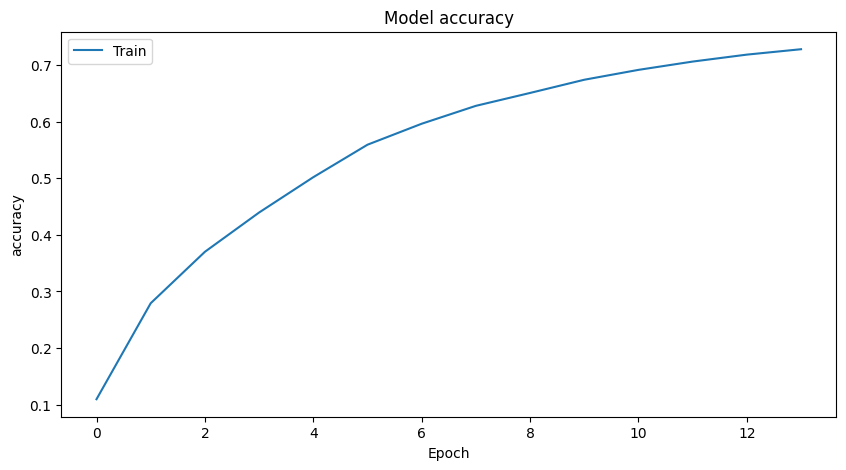

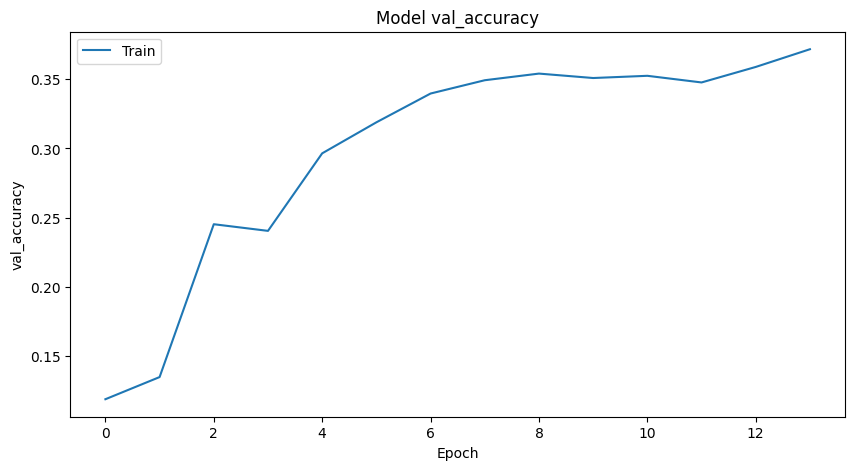

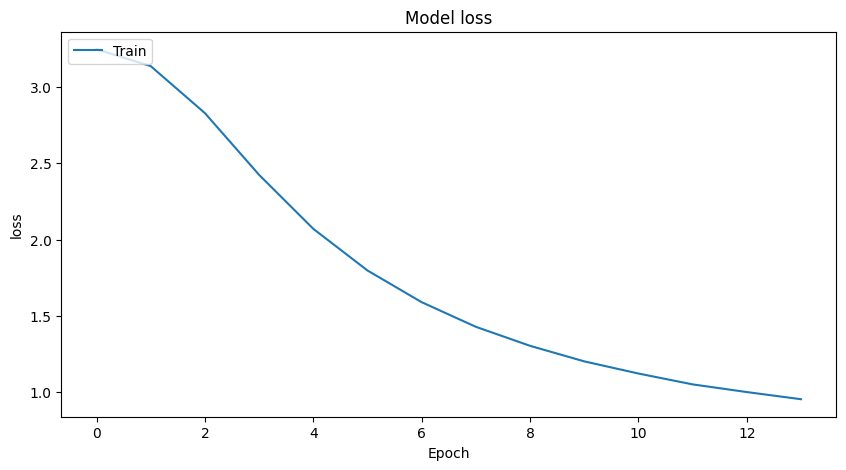

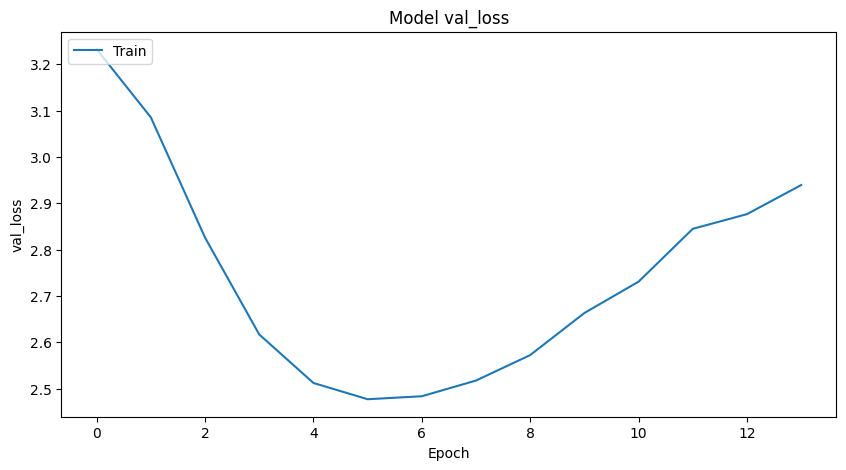

In [6]:
# Example usage
output_dir = 'results'

# Optionally debug CSVs before proceeding
csv_file_path = 'results/runs_history.csv'
debug_csv_file(csv_file_path, expected_columns=18)

# Generate the report
generate_report(output_dir)
